In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("..")
import AnalyzeSymAsym as asa

In [4]:
BASE = Path("../SymAsymRNN") / "N100T100"

# Pick the conditions you want to compare
conditions = {
    "baseline • none • asym1": pd.read_csv(
        BASE / "baseline/none/asym1/analysis/timeseries_metrics.csv"
    ),
    "cycshift • frobenius • asym1": pd.read_csv(
        BASE / "cycshift/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    "identity • frobenius • asym1": pd.read_csv(
        BASE / "identity/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
    "shiftcycmh • frobenius • asym1": pd.read_csv(
        BASE / "shiftcycmh/frobenius/asym1/analysis/timeseries_metrics.csv"
    ),
}

condition_roots = {
    "baseline • none • asym1": BASE / "baseline/none/asym1/multiruns",
    "cycshift • frobenius • asym1": BASE / "cycshift/frobenius/asym1/multiruns",
    "identity • frobenius • asym1": BASE / "identity/frobenius/asym1/multiruns",
    "shiftcycmh • frobenius • asym1": BASE / "shiftcycmh/frobenius/asym1/multiruns",
}

,condition,slope,intercept,r2,half_life_epochs,fit_emin,fit_emax
0,baseline • none • asym1,NaN,NaN,NaN,NaN,0,19000
1,cycshift • frobenius • asym1,NaN,NaN,NaN,NaN,0,19000
2,identity • frobenius • asym1,NaN,NaN,NaN,NaN,0,19000
3,shiftcycmh • frobenius • asym1,NaN,NaN,NaN,NaN,0,19000


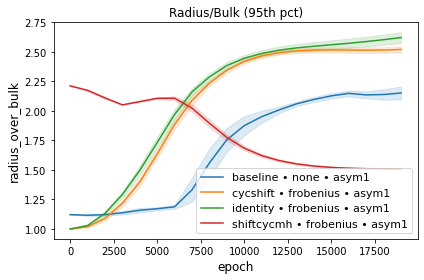

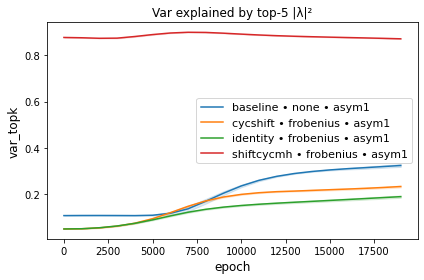

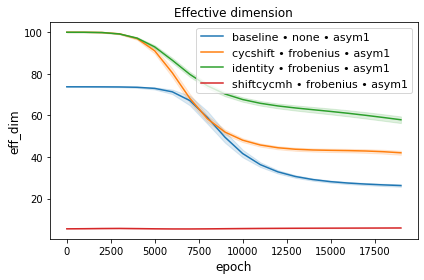

In [5]:
asa.overlay_metric(conditions, key="radius_over_bulk", title="Radius/Bulk (95th pct)")
asa.overlay_metric(conditions, key="var_topk", title="Var explained by top-5 |λ|²")
asa.overlay_metric(conditions, key="eff_dim", title="Effective dimension")

,condition,slope,intercept,r2,half_life_epochs,fit_emin,fit_emax
0,baseline • none • asym1,NaN,NaN,NaN,NaN,0,19000
1,cycshift • frobenius • asym1,NaN,NaN,NaN,NaN,0,19000
2,identity • frobenius • asym1,NaN,NaN,NaN,NaN,0,19000
3,shiftcycmh • frobenius • asym1,NaN,NaN,NaN,NaN,0,19000


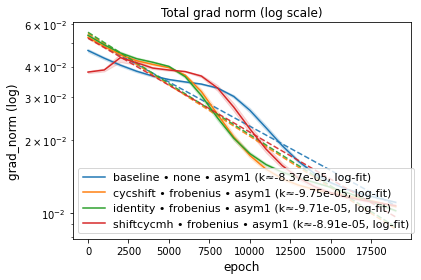

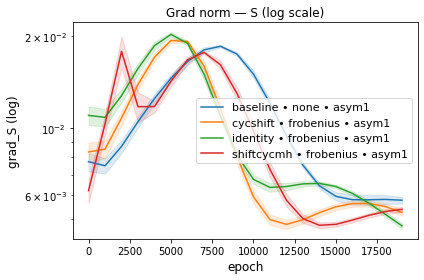

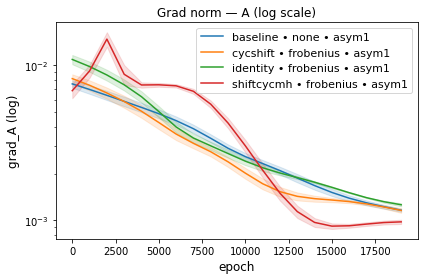

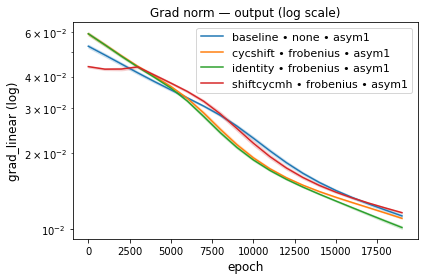

In [6]:
# total grad norm
asa.overlay_metric(
    conditions, key="grad_norm", title="Total grad norm", logy=True, fit=True
)

# per-group grad norms
asa.overlay_metric(conditions, key="grad_S", title="Grad norm — S", logy=True)
asa.overlay_metric(conditions, key="grad_A", title="Grad norm — A", logy=True)
asa.overlay_metric(conditions, key="grad_linear", title="Grad norm — output", logy=True)

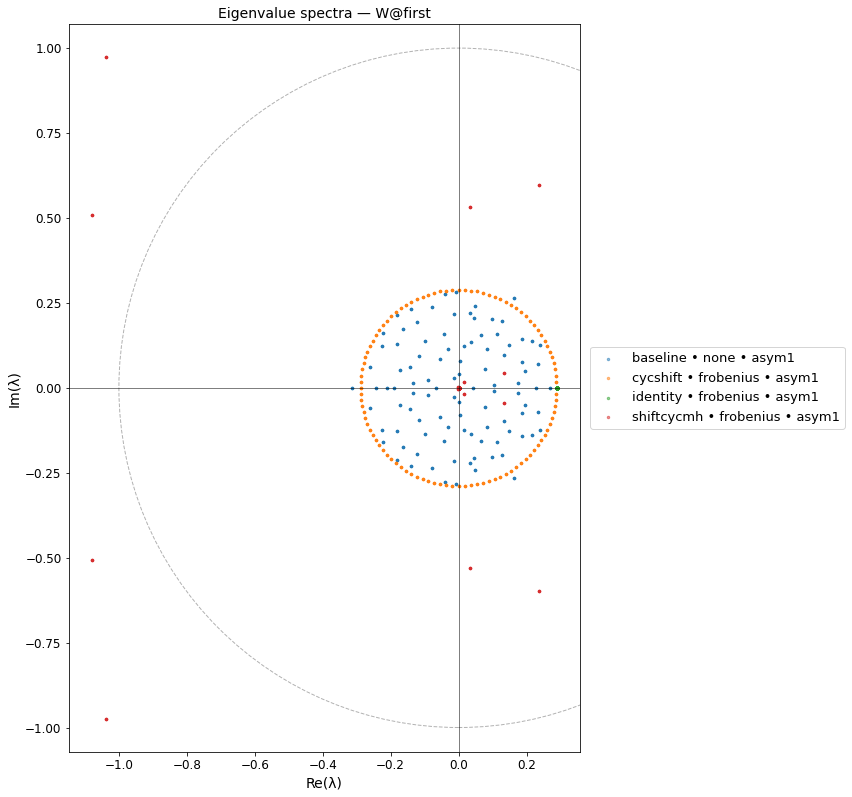

In [7]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_eigs_snapshots(
    condition_roots,
    snapshot="first",  # or "first" / "middle"
    matrix="W",  # choose "W", "S", or "A"
    title="Eigenvalue spectra",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
)

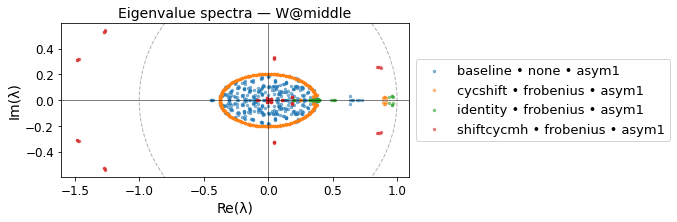

In [8]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_eigs_snapshots(
    condition_roots,
    snapshot="middle",  # or "first" / "middle"
    matrix="W",  # choose "W", "S", or "A"
    title="Eigenvalue spectra",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
)

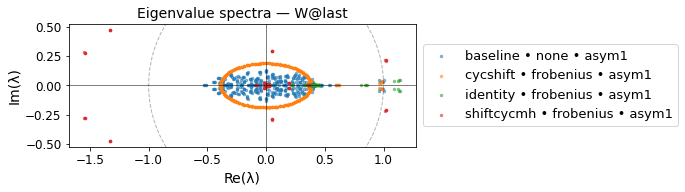

In [9]:
# Plot last snapshot, full W matrix, legend outside
asa.overlay_eigs_snapshots(
    condition_roots,
    snapshot="last",  # or "first" / "middle"
    matrix="W",  # choose "W", "S", or "A"
    title="Eigenvalue spectra",
    fontsize=14,
    figsize=(12, 12),
    max_points_per_run=1500,
)

,condition,init_epoch,init_loss,slope,intercept,r2,half_life_epochs,fit_emin,fit_emax
0,baseline • none • asym1,0,0.176108,-0.000125,-1.775401,0.983024,5542.425993,0,19000
1,cycshift • frobenius • asym1,0,0.177061,-0.000119,-1.957900,0.944239,5800.855055,0,19000
2,identity • frobenius • asym1,0,0.177105,-0.000129,-1.946258,0.957511,5355.315024,0,19000
3,shiftcycmh • frobenius • asym1,0,0.178762,-0.000121,-1.805387,0.959649,5741.506454,0,19000


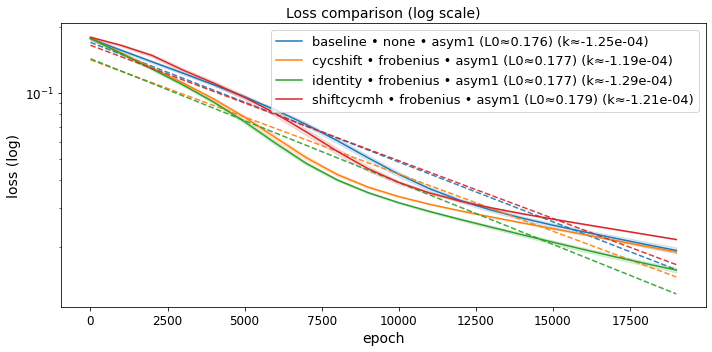

In [10]:
# Now overlay them
# asa.overlay_quick(conditions)
fit_stats = asa.overlay_loss(
    conditions,
    title="Loss comparison",
    fontsize=14,
    figsize=(10, 5),
    fit=True,
    fit_range=None,
    plot_fit=True,
    logy=True,
)
display(fit_stats)

,condition,init_epoch,init_loss,slope,intercept,r2,half_life_epochs,fit_emin,fit_emax
0,baseline • none • asym1,0,0.176108,NaN,NaN,NaN,NaN,0,19000
1,cycshift • frobenius • asym1,0,0.177061,NaN,NaN,NaN,NaN,0,19000
2,identity • frobenius • asym1,0,0.177105,NaN,NaN,NaN,NaN,0,19000
3,shiftcycmh • frobenius • asym1,0,0.178762,NaN,NaN,NaN,NaN,0,19000


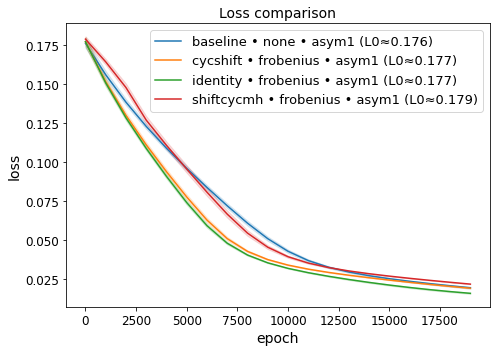

In [11]:
asa.overlay_loss(
    conditions,
    title="Loss comparison",
    fontsize=14,
    figsize=(7, 5),
    fit=False,
    fit_range=None,
    plot_fit=False,
    logy=False,
)

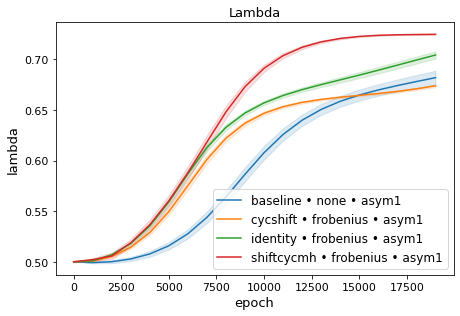

In [12]:
fit_spec = asa.overlay_metric(
    conditions,
    key="lambda",
    title="Lambda",
    fontsize=13,
    figsize=(6.5, 4.5),
    logy=False,
    fit=False,
    fit_on_log=False,  # ln(metric) fit
    fit_range=None,
    plot_fit=False,
)

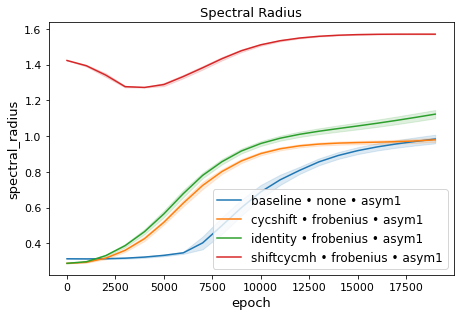

In [13]:
fit_spec = asa.overlay_metric(
    conditions,
    key="spectral_radius",
    title="Spectral Radius",
    fontsize=13,
    figsize=(6.5, 4.5),
    logy=False,
    fit=False,
    fit_on_log=False,  # ln(metric) fit
    fit_range=None,
    plot_fit=False,
)